# Results section 2: connectivity
## Macro-level connectivity

### Preparations

In [1]:
%run fix_notebook_imports.py

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

from analysis.statics import COUNTRIES, YEARS

In [3]:
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 24

In [4]:
def plot_connectivity_lcc(df, country, years, statutes, regulations, save=True):
    df[['fraction_scc_in_lcc','fraction_in_in_lcc','fraction_out_in_lcc','fraction_rest_in_lcc']
          ].plot.line(xlim=(years[0] - 1,years[-1] + 1), xticks=years, ylim=(0,1), yticks=np.arange(0,1.1,0.1),
                      figsize=(12,9), color=['magenta','b','r','k'], style=['.-','.--', '.-.','.:'], markersize=10, lw=2)
    plt.legend(["Strongly connected component","In-only component", "Out-only component", "Tendrils and tubes"], fontsize=18)
    plt.xlabel("Year", fontsize=24)
    plt.ylabel("Fraction of nodes in largest connected component", fontsize=24)
    plt.xticks(years[::3], fontsize=24)
    plt.yticks(fontsize=24)
    plt.tight_layout()
    if save:
        if statutes and not regulations:
            plt.savefig(f"../graphics/connectivity-lcc-statutes-only-{country}.pdf")
        elif regulations and not statutes:
            plt.savefig(f"../graphics/connectivity-lcc-regulations-only-{country}.pdf")
        else:
            plt.savefig(f"../graphics/connectivity-lcc-{country}.pdf")
        plt.close()
        
def plot_connectivity_development(df, country, years, statutes, regulations, save=True):
    custom_lines1 = [Line2D([0], [0], color='green', lw=6),
                 Line2D([0], [0], color='orange', lw=4),
                 Line2D([0], [0], color='brown', lw=4)]
    custom_lines2 = [Line2D([0], [0], color='k', lw=4)]
    fig, ax = plt.subplots(figsize=(12,9))
    ax.set_yticks(np.arange(0,1.1,0.1))
    plt.yticks(fontsize=24)
    plt.xticks(years[::3], fontsize=24)
    df[['percent_nodes_in_lcc',
        'percent_nodes_in_satellites','percent_isolates']
      ].plot.line(xlim=(years[0]-1,years[-1] + 1),ylim=(0,1),xticks=df.index,ax=ax,
                  color=['green','orange','brown'],legend=False,style=['.--', '.-.','.:'],markersize=10,lw=2)

    ax.legend(custom_lines1, ['Nodes in largest connected component',
                              'Nodes in satellites','Isolated nodes'], fontsize=18, 
              loc='center right' if statutes and not regulations and country == 'us' else 'upper right')
    ax.set_xlabel("Year", fontsize=24)
    ax.set_ylabel("Fraction of sections", fontsize=24)
    ax.set_axisbelow(True)
    plt.xticks(years[::3], fontsize=24)
    plt.tight_layout()
    if save:
        if statutes and not regulations:
            plt.savefig(f"../graphics/connectivity-development-statutes-only-{country}.pdf")
        elif regulations and not statutes:
            plt.savefig(f"../graphics/connectivity-development-regulations-only-{country}.pdf")
        else:
            plt.savefig(f"../graphics/connectivity-development-{country}.pdf")
        plt.close()

### Individual country figures

In [5]:
for country in COUNTRIES:
    for statutes, regulations in [(True, True), (True, False), (False, True)]:
        if statutes and not regulations:
            df = pd.read_pickle(f"../results/connectivity-data-statutes-only-{country}.gpickle.gz")
        elif regulations and not statutes:
            df = pd.read_pickle(f"../results/connectivity-data-regulations-only-{country}.gpickle.gz")
        else:
            df = pd.read_pickle(f"../results/connectivity-data-{country}.gpickle.gz")
            
        plot_connectivity_lcc(df, country, YEARS, statutes, regulations, save=True)
        plot_connectivity_development(df, country, YEARS, statutes, regulations, save=True)

### Number of nontrivial connected components for all datasets together

In [6]:
de_stats = pd.read_csv(f"../results/basic-statistics-de.csv", index_col=0)
us_stats = pd.read_csv(f"../results/basic-statistics-us.csv", index_col=0)

df_de_statutes = pd.read_pickle(f"../results/connectivity-data-statutes-only-de.gpickle.gz"
                               )[['number_of_nontrivial_ccs']].rename({'number_of_nontrivial_ccs':'de_statutes'},axis=1)
df_de_statutes_rel = df_de_statutes.divide(de_stats.tokens_n_abs_sta, axis=0) * 1000
df_us_statutes = pd.read_pickle(f"../results/connectivity-data-statutes-only-us.gpickle.gz"
                               )[['number_of_nontrivial_ccs']].rename({'number_of_nontrivial_ccs':'us_statutes'},axis=1)
df_us_statutes_rel = df_us_statutes.divide(us_stats.tokens_n_abs_sta, axis=0) * 1000

df_de_regs = pd.read_pickle(f"../results/connectivity-data-regulations-only-de.gpickle.gz"
                           )[['number_of_nontrivial_ccs']].rename({'number_of_nontrivial_ccs':'de_regulations'},axis=1)
df_de_regs_rel = df_de_regs.divide(de_stats.tokens_n_abs_reg, axis=0) * 1000
df_us_regs = pd.read_pickle(f"../results/connectivity-data-regulations-only-us.gpickle.gz"
                           )[['number_of_nontrivial_ccs']].rename({'number_of_nontrivial_ccs':'us_regulations'},axis=1)
df_us_regs_rel = df_us_regs.divide(us_stats.tokens_n_abs_reg, axis=0) * 1000

df_de_all = pd.read_pickle(f"../results/connectivity-data-de.gpickle.gz"
                          )[['number_of_nontrivial_ccs']].rename({'number_of_nontrivial_ccs':'de_all'},axis=1)
df_de_all_rel = df_de_all.divide(de_stats.tokens_n_abs_sta + de_stats.tokens_n_abs_reg, axis=0) * 1000
df_us_all = pd.read_pickle(f"../results/connectivity-data-us.gpickle.gz"
                          )[['number_of_nontrivial_ccs']].rename({'number_of_nontrivial_ccs':'us_all'},axis=1)
df_us_all_rel = df_us_all.divide(us_stats.tokens_n_abs_sta + us_stats.tokens_n_abs_reg, axis=0) * 1000

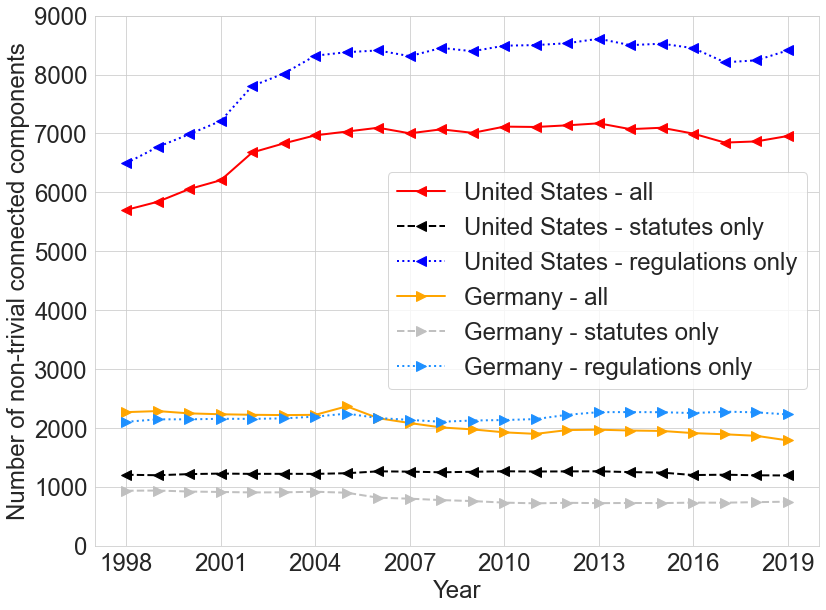

In [7]:
fig, ax = plt.subplots(figsize=(12,9))
pd.concat([df_us_all,df_us_statutes,df_us_regs,df_de_all,df_de_statutes,df_de_regs],axis=1
         ).plot.line(xlim=(YEARS[0]-1,YEARS[-1]+1),ylim=(0,9000),xticks=df_de_all.index,yticks=range(0,9001,500),ax=ax,
                     color=['r','k','b','orange','silver','dodgerblue'],legend=True,style=['<-', '<--','<:','>-','>--','>:'],markersize=10,lw=2)
plt.xticks(YEARS[::3], fontsize=24)
plt.yticks(range(0,9000+1,1000), fontsize=24)
plt.legend(["United States - all","United States - statutes only", "United States - regulations only", 
            "Germany - all", "Germany - statutes only", "Germany - regulations only"], fontsize=24)
plt.xlabel("Year", fontsize=24)
plt.ylabel("Number of non-trivial connected components", fontsize=24)
plt.tight_layout()
plt.savefig("../graphics/connectivity-number-of-components-comparison.pdf")

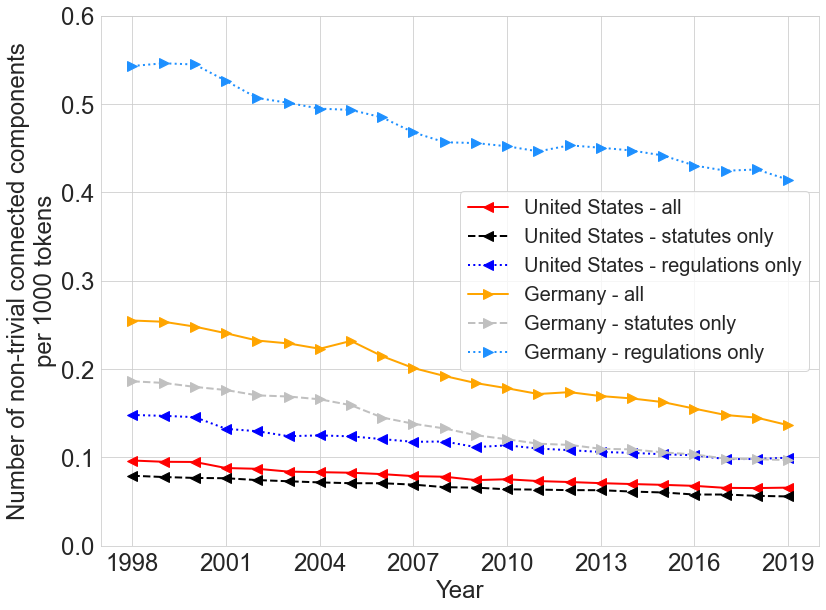

In [8]:
fig, ax = plt.subplots(figsize=(12,9))
pd.concat([df_us_all_rel,df_us_statutes_rel,df_us_regs_rel,df_de_all_rel,df_de_statutes_rel,df_de_regs_rel],axis=1
         ).plot.line(xlim=(YEARS[0]-1,YEARS[-1]+1),xticks=df_de_all.index,ylim=(0,0.6),ax=ax,
                     color=['r','k','b','orange','silver','dodgerblue'],legend=True,style=['<-', '<--','<:','>-','>--','>:'],markersize=10,lw=2)
plt.xticks(YEARS[::3], fontsize=24)
plt.yticks(fontsize=24)
plt.legend(["United States - all","United States - statutes only", "United States - regulations only", 
            "Germany - all", "Germany - statutes only", "Germany - regulations only"], 
           fontsize=20, loc="center right")
plt.xlabel("Year", fontsize=24)
plt.ylabel("Number of non-trivial connected components\nper 1000 tokens", fontsize=24)
plt.tight_layout()
plt.savefig("../graphics/connectivity-number-of-components-comparison-rel.pdf")

### The end.